In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
iris = load_iris()

<img src="assets/img.png">
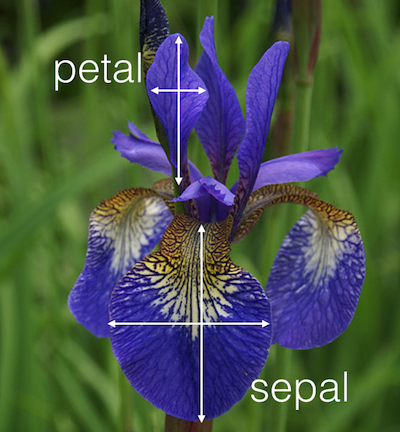

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df["target"] = iris.target
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df.flower_name.value_counts()

flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [42]:
# create different dataset for different flowers
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]

In [11]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


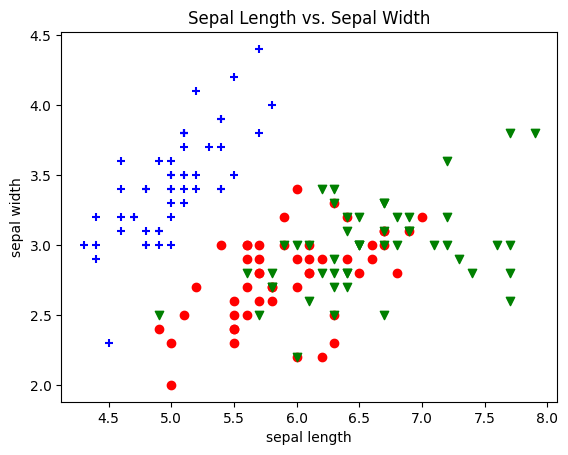

In [12]:
%matplotlib inline
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal Length vs. Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='Blue', marker='+', label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='Red', marker='o', label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='Green', marker='v', label='virginia')

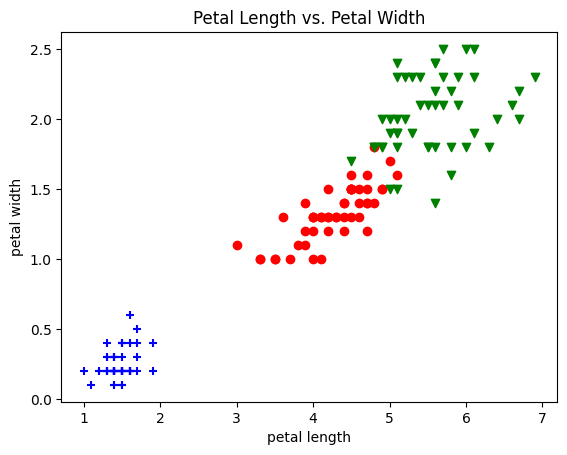

In [13]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal Length vs. Petal Width')
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"], color='Blue', marker='+', label='setosa')
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color='Red', marker='o', label='versicolor')
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color='Green', marker='v', label='virginia')

In [14]:
X = df.drop(["target", "flower_name"], axis=1)
y = df["target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create KNN (K Nearest Neighbour Classifier)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=1)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [37]:
knn.score(X_test, y_test)

1.0

#### Plot Confusion Matrix

In [38]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

<Axes: title={'center': 'Confusion Matrix'}>

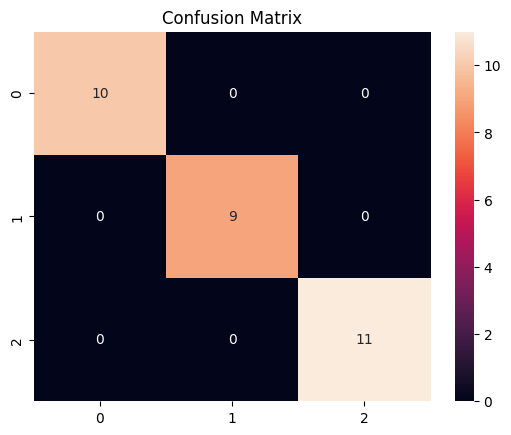

In [39]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True)

#### classification report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

